<a href="https://colab.research.google.com/github/Charzy-1/Thesis_Project/blob/main/Thesis_pythoncode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('welcome to colab')

welcome to colab


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as pdr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/2013.csv')

In [ ]:
#Get the stock
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-10,3246.060059,3299.159912,3245.800049,3297.250000,3297.250000,1769870000
1,2013-04-11,3289.590088,3306.949951,3287.739990,3300.159912,3300.159912,1829170000
2,2013-04-12,3292.389893,3296.500000,3271.020020,3294.949951,3294.949951,1471180000
3,2013-04-15,3277.580078,3283.399902,3213.459961,3216.489990,3216.489990,1779320000
4,2013-04-16,3239.050049,3265.840088,3231.449951,3264.629883,3264.629883,1515400000


In [ ]:
df1 = df[['Date', 'Close']]
df1.head()

,Date,Close
0,2013-04-10,3297.250000
1,2013-04-11,3300.159912
2,2013-04-12,3294.949951
3,2013-04-15,3216.489990
4,2013-04-16,3264.629883


In [ ]:
df1.index = df1.pop('Date')
df1.head()


,Close
Date,
2013-04-10,3297.250000
2013-04-11,3300.159912
2013-04-12,3294.949951
2013-04-15,3216.489990
2013-04-16,3264.629883


In [ ]:
import datetime

In [ ]:
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetimeobj=str_to_datetime('2013-04-10')
datetimeobj

datetime.datetime(2013, 4, 10, 0, 0)

In [ ]:
df.shape

(2517, 7)

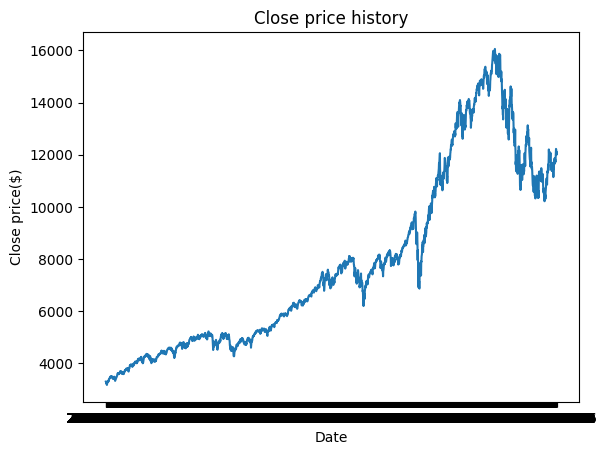

In [ ]:
#Plotting the closing price
plt.title('Close price history')
plt.plot(df1.index, df1['Close'])
plt.xlabel('Date')
plt.ylabel('Close price($)')  
plt.show()

In [ ]:
#create a new dataframe with only the close column
close_data_df = df1.filter(['Close'])
#converting the dataframe to a numpy array
dataset = close_data_df.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(close_data_df) * .8)

print(training_data_len)

2014


In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
#transforming our data based on two imput values (0 and 1) above this code 
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01015352],
       [0.01037925],
       [0.0099751 ],
       ...,
       [0.69505191],
       [0.68500855],
       [0.69207542]])

In [ ]:
#create the training dataset
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train datasets
x_train = [] #independent training variable or training features
y_train = [] #dependent variable or target variable

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
# x_train holds the past 60 values
# y_train dataset contains the 61st value that we want our model to predict

[array([0.01015352, 0.01037925, 0.0099751 , 0.00388873, 0.00762308,
       0.00297181, 0.        , 0.00307965, 0.00521213, 0.00798769,
       0.0080125 , 0.00959034, 0.00875799, 0.01091141, 0.01260018,
       0.01029935, 0.01351787, 0.01646641, 0.01757881, 0.01786272,
       0.01915355, 0.01883549, 0.02096178, 0.02113321, 0.02298101,
       0.02367994, 0.02318501, 0.02580155, 0.02560451, 0.02604592,
       0.02303453, 0.02273353, 0.02271181, 0.02501961, 0.02336188,
       0.02520657, 0.02246125, 0.02319511, 0.02163511, 0.01823896,
       0.01998979, 0.02349375, 0.02384671, 0.02099047, 0.0181575 ,
       0.02164287, 0.01995178, 0.02216802, 0.0244991 , 0.0214753 ,
       0.01538116, 0.01480791, 0.01197727, 0.01408181, 0.01627946,
       0.01826845, 0.01837626, 0.02079964, 0.02071508, 0.02151176])]
[0.024281888573878224]

[array([0.01015352, 0.01037925, 0.0099751 , 0.00388873, 0.00762308,
       0.00297181, 0.        , 0.00307965, 0.00521213, 0.00798769,
       0.0080125 , 0.00959034, 0.0

In [ ]:
#convert the x_train and y_trainto numpy arrays to use them in training LSTM models
x_train, y_train =np.array(x_train), np.array(y_train)

In [ ]:
# reshape the training data to numpy array as LSTM model expects a 3D array and not 2D


In [ ]:
#Reshape x_train the data because LSTM network expects the input to be 3D in the form of no. of samples, no. of time steps and number of features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1954, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
#Add LSTM layers to our model
model.add(LSTM(30, return_sequences=False, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(50, return_sequences=False))
# model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#An optimizer is used to improve upon the loss function while the loss funtion is used to measure how well the model did on training

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=128, epochs=50) #fit is another name for train
#batch size it the total no. of training present in a single batch
#epoch is the no. of iterations when an entire dataset is passed forward and backward through a neural network

Epoch 1/50
16/16 [==============================] - 1s 53ms/step - loss: 2.8047e-04
Epoch 2/50
16/16 [==============================] - 1s 49ms/step - loss: 2.6785e-04
Epoch 3/50
16/16 [==============================] - 0s 31ms/step - loss: 2.6177e-04
Epoch 4/50
16/16 [==============================] - 1s 45ms/step - loss: 2.5900e-04
Epoch 5/50
16/16 [==============================] - 1s 49ms/step - loss: 2.5951e-04
Epoch 6/50
16/16 [==============================] - 1s 51ms/step - loss: 2.6091e-04
Epoch 7/50
16/16 [==============================] - 1s 51ms/step - loss: 2.5169e-04
Epoch 8/50
16/16 [==============================] - 1s 51ms/step - loss: 2.4940e-04
Epoch 9/50
16/16 [==============================] - 1s 48ms/step - loss: 2.6165e-04
Epoch 10/50
16/16 [==============================] - 0s 30ms/step - loss: 2.6209e-04
Epoch 11/50
16/16 [==============================] - 0s 29ms/step - loss: 2.4839e-04
Epoch 12/50
16/16 [==============================] - 0s 30ms/step - loss: 

In [ ]:
#Create the testing data set
#Create a new array containing scaled data from 2014 to 2157(end of the data set)
test_data = scaled_data[training_data_len - 60:, :]
#Create the datasets x_test and y_test
x_test = [] #contains the past 60 values
y_test = dataset[training_data_len:, :]#All the values we want our model to predict which is our actual test values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array so we can use it in the LSTM model
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape

(503, 60, 1)

In [ ]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 8ms/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f'The root mean squared value is: {rmse}')

The root mean squared value is: 7.296383845427471


<ipython-input-248-18ff6062a18d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


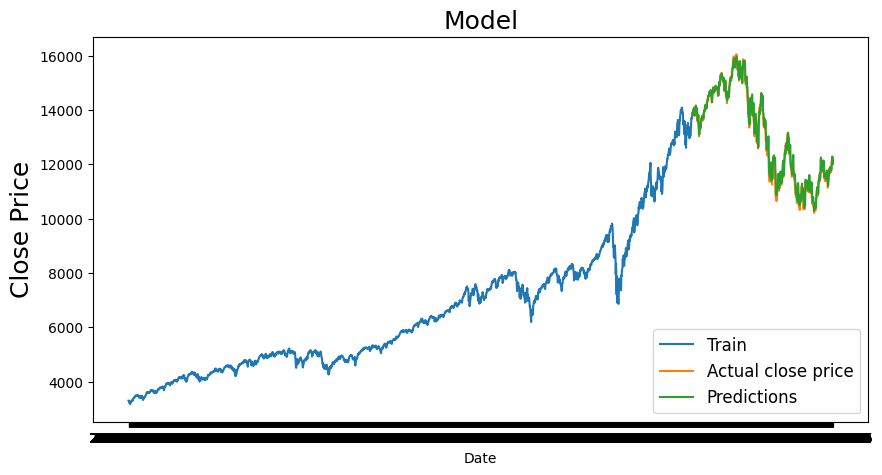

In [ ]:
#plot the data
train = close_data_df[:training_data_len]
valid = close_data_df[training_data_len:]
valid['predictions'] = predictions
#visualise the data
plt.figure(figsize=(10,5))
plt.title('Model', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Actual close price', 'Predictions'], loc='lower right', fontsize=12)

In [ ]:
valid.head()

,Close,predictions
Date,,
2021-04-09,13900.190430,13822.927734
2021-04-12,13850.000000,13927.326172
2021-04-13,13996.099609,13894.690430
2021-04-14,13857.839844,14011.433594
2021-04-15,14038.759766,13909.102539


In [ ]:
import seaborn as sns

<Axes: xlabel='Close', ylabel='predictions'>

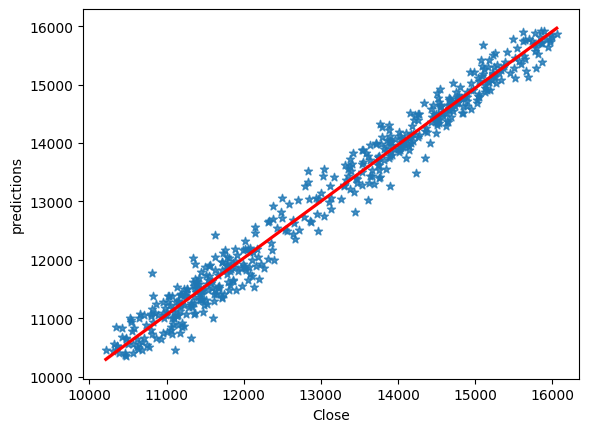

In [ ]:
sns.regplot(x=valid['Close'], y=valid['predictions'],line_kws={"color": "red"}, marker='*')

In [ ]:
from sklearn.metrics import mean_squared_error

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r = np.corrcoef(y_true, y_pred)[0,1]
    return rmse, mape, r

In [ ]:
calculate_metrics(valid['Close'], valid['predictions'])

(214.90683776977198, 1.3200591987617158, 0.9922680865161405)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rmse_data = [32.6426,24.6113, 31.1444, 24.7313, 59.2932, 37.4523, 124.6219, 25.3061]
mape_data = [1.3874, 1.3186, 1.7106, 1.5746, 1.6053, 1.4294, 1.6972, 1.4264]
r_data = [0.9916, 0.9919, 0.9871, 0.9888, 0.9892, 0.9908, 0.9896, 0.9907]

fig, ax = sns.subplots()

boxplot_data = [rmse_data, mape_data, r_data]
labels = ['RMSE', 'MAPE', 'R']

ax.boxplot(boxplot_data)
ax.set_xticklabels(labels)

# plt.show()




AttributeError: ignored